In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('challenge_train.csv')
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,NaN,3201
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,1332
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724


### PreProcessing 

In [5]:
df_train.columns

Index(['Mileage', 'Age', 'Brand', 'Horsepower', 'Price', 'Accidents_History',
       'Last_Service_Date', 'ID'],
      dtype='object')

In [7]:
df_train.shape

(2000, 8)

In [11]:
# basic information fo dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                1933 non-null   float64
 2   Brand              1921 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  1925 non-null   object 
 7   ID                 2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


In [10]:
# Basic statistic of data set 
df_train.describe().style.background_gradient('bone_r')

,Mileage,Age,Horsepower,Price,Accidents_History,ID
count,2000.000000,1933.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,47371.271244,4.901168,140.571945,16286.915618,0.511000,4970.844000
std,21094.525714,2.890400,67.811117,11201.085165,0.706490,2915.969163
min,-74007.968084,0.007267,-257.937259,-4234.207009,0.000000,4.000000
25%,38666.978977,2.348844,109.931002,11464.115851,0.000000,2461.750000
50%,49345.990091,4.843951,144.027053,15396.886224,0.000000,4816.500000
75%,59000.476654,7.439484,180.082763,18697.747795,1.000000,7543.750000
max,107024.903225,9.999566,295.591933,91450.965098,4.000000,9997.000000


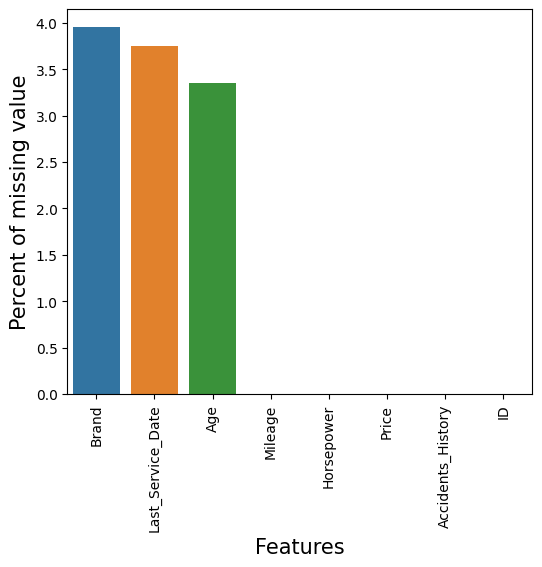

In [19]:
# check missing value 
total = df_train.isna().sum().sort_values(ascending = False)
percent = (df_train.isna().sum()/df_train.isna().count()*100
          ).sort_values(ascending=False)
miss = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
plt.figure(figsize=(6, 5))
plt.xticks(rotation = 90)
sns.barplot(x=miss.index, y = miss['Percent'])
plt.xlabel("Features", fontsize=15)
plt.ylabel('Percent of missing value', fontsize=15)
plt.show()

In [22]:
# checking duplicate values 
df_train.duplicated().sum()

0

<Axes: >

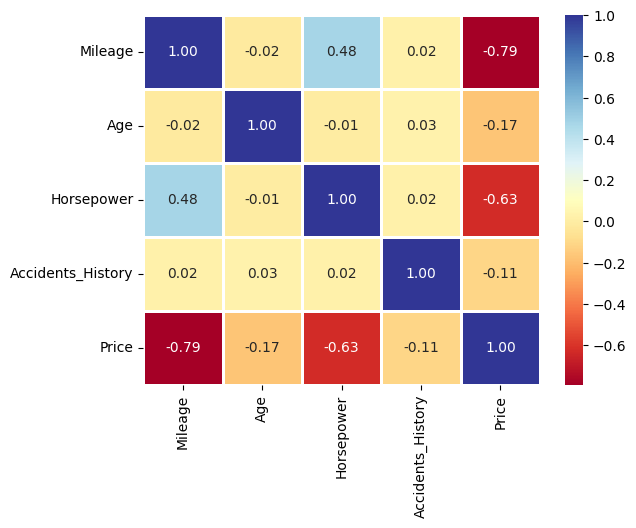

In [25]:
# checkink heatmap
sns.heatmap(df_train[["Mileage", 'Age', 'Horsepower', 'Accidents_History', 'Price']].corr(), annot = True, 
            cmap = 'RdYlBu', 
            fmt = '.2f', 
            annot_kws = None, 
            linewidths = 1,)

### Explore Data Analysis 

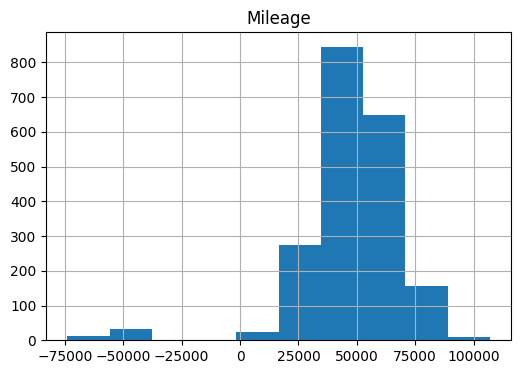

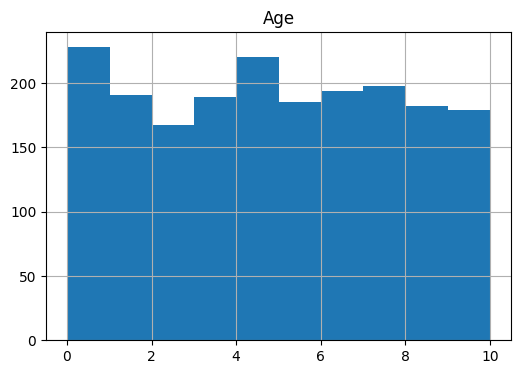

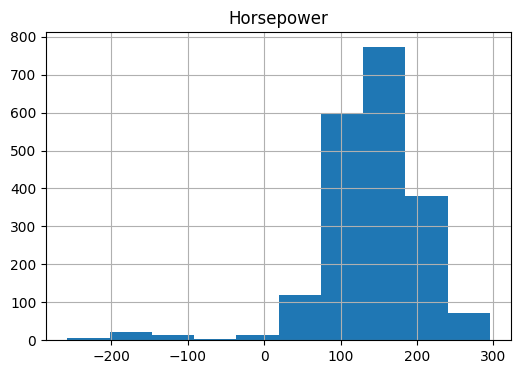

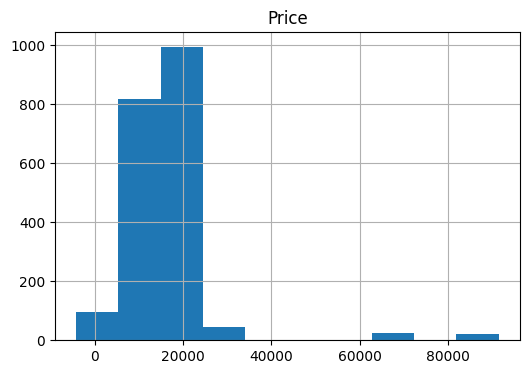

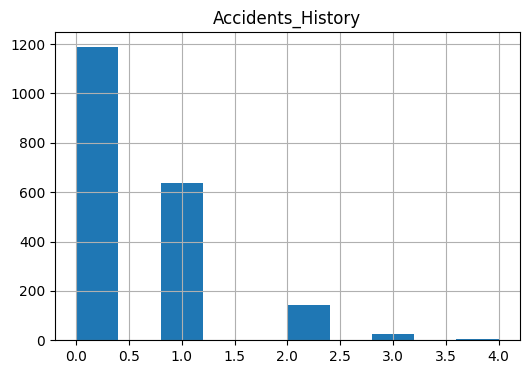

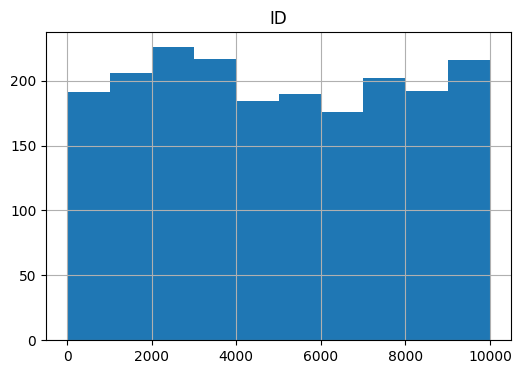

In [46]:
numeric_columns = df_train.select_dtypes(exclude=['object']).columns
for i in numeric_columns: 
    df_train.hist(column=i, bins=10, figsize=(6, 4))
    plt.show()

In [74]:
# checking relation of mileage values is less than 0 and price 
df_mileage_lessthan_0 = df_train[df_train['Mileage'] < 0]
df_mileage_lessthan_0[["Mileage", "Price"]]

,Mileage,Price
37,-49831.578333,68853.503157
92,-38923.009097,91450.965098
94,-57857.642804,68853.503157
272,-48487.798600,68853.503157
355,-30605.924378,91450.965098
360,-61949.580135,68853.503157
420,-40871.813906,68853.503157
422,-38837.992923,91450.965098
428,-51001.940544,91450.965098
522,-59972.750589,68853.503157


Lower bound:  613.6679339549501
Upper bound:  29548.19571194713


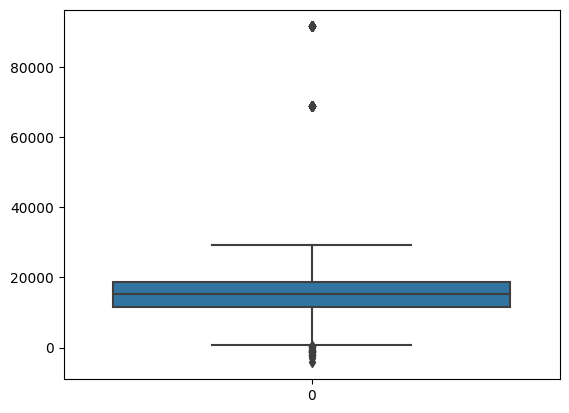

In [57]:
#  Compute IQR for "Price" column
Q1 = df_train["Price"].quantile(0.25)
Q3 = df_train["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Lower bound: ", lower_bound)
print("Upper bound: ", upper_bound )

sns.boxplot(data=df_train["Price"])
plt.show()

In [60]:
df_train[df_train["Price"] < lower_bound]

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
43,66916.754452,8.731311,BMW,102.087955,-1789.246237,0,2020-12-05,4692
317,59211.190555,9.271504,BMW,146.763951,-998.012033,1,2020-12-30,9160
373,89308.607690,6.551304,BMW,76.866977,183.984650,0,2021-11-29,2144
433,83889.634260,7.283870,BMW,196.238952,280.667582,0,2022-11-26,9388
655,74399.743435,8.847605,BMW,163.670294,-1190.194393,0,2023-02-01,9985
669,77021.738129,7.813414,BMW,227.912559,-599.351189,0,2021-03-06,1304
774,65812.668634,9.978134,BMW,177.164044,-4234.207009,0,2021-08-13,8704
831,73283.647701,6.330741,BMW,101.191930,-88.596122,0,2020-09-27,4403
868,48918.904680,9.003497,BMW,123.688320,-1041.793085,2,2021-06-02,4793
879,65979.732381,8.130068,BMW,87.522107,-1311.842540,1,2020-12-07,2076


In [69]:
df_train[df_train["Price"] > upper_bound]

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
37,-49831.578333,9.725981,BMW,-61.026444,68853.503157,1,2021-01-22,2699
92,-38923.009097,2.212056,Ford,-100.487866,91450.965098,1,2022-12-03,4320
94,-57857.642804,3.683433,Ford,-191.762807,68853.503157,0,2022-09-25,8002
272,-48487.798600,2.135476,Ford,-159.152098,68853.503157,0,2023-04-22,3281
355,-30605.924378,9.647228,Ford,-244.797624,91450.965098,1,2021-04-05,2532
360,-61949.580135,7.210926,Toyota,-115.704693,68853.503157,1,2023-08-19,6481
420,-40871.813906,0.958620,Ford,-82.115845,68853.503157,0,2021-04-23,166
422,-38837.992923,8.188661,NaN,-166.240681,91450.965098,1,2023-01-28,7492
428,-51001.940544,4.354392,Ford,-178.429776,91450.965098,0,2020-10-07,9819
522,-59972.750589,7.785880,BMW,-178.507057,68853.503157,0,2023-08-12,7012


In [79]:
df_mileage_2 = df_train[df_train["Price"] < lower_bound]
df_mileage_2

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
43,66916.754452,8.731311,BMW,102.087955,-1789.246237,0,2020-12-05,4692
317,59211.190555,9.271504,BMW,146.763951,-998.012033,1,2020-12-30,9160
373,89308.607690,6.551304,BMW,76.866977,183.984650,0,2021-11-29,2144
433,83889.634260,7.283870,BMW,196.238952,280.667582,0,2022-11-26,9388
655,74399.743435,8.847605,BMW,163.670294,-1190.194393,0,2023-02-01,9985
669,77021.738129,7.813414,BMW,227.912559,-599.351189,0,2021-03-06,1304
774,65812.668634,9.978134,BMW,177.164044,-4234.207009,0,2021-08-13,8704
831,73283.647701,6.330741,BMW,101.191930,-88.596122,0,2020-09-27,4403
868,48918.904680,9.003497,BMW,123.688320,-1041.793085,2,2021-06-02,4793
879,65979.732381,8.130068,BMW,87.522107,-1311.842540,1,2020-12-07,2076


Lower bound of Mileage:  8166.732460805411
Upper bound of Mileage:  89500.72316995266


<Axes: >

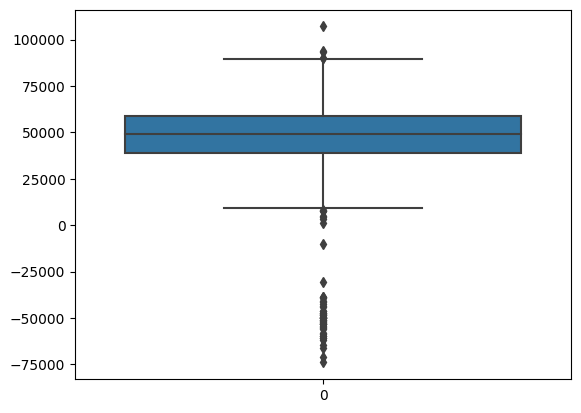

In [86]:
# Compute IQR of mileage column 
Q1_mil = df_train["Mileage"].quantile(0.25)
Q3_mil = df_train["Mileage"].quantile(0.75)
IQR_mil = Q3_mil - Q1_mil

lower_bound_mil = Q1_mil - 1.5*IQR_mil
upper_bound_mil = Q3_mil + 1.5*IQR_mil
print("Lower bound of Mileage: ", lower_bound_mil)
print("Upper bound of Mileage: ", upper_bound_mil)
sns.boxplot(data=df_train["Mileage"])

In [87]:
df_train[df_train["Mileage"] > upper_bound_mil]

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
467,93936.443626,6.124562,Ford,247.123506,5975.283322,2,2023-03-03,8935
638,90208.562612,7.428474,toyota,48.705350,8287.196537,0,NaN,9571
1011,89940.900706,9.107376,Toyota,99.487996,4651.059550,1,2020-10-27,2443
1175,107024.903225,6.173297,Ford,127.126727,6927.889535,0,2022-05-19,2317
1847,93221.910697,6.698276,Ford,285.919743,5856.381293,0,2021-06-17,5264


In [88]:
df_train[df_train["Mileage"] < lower_bound_mil]

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
37,-49831.578333,9.725981,BMW,-61.026444,68853.503157,1,2021-01-22,2699
92,-38923.009097,2.212056,Ford,-100.487866,91450.965098,1,2022-12-03,4320
94,-57857.642804,3.683433,Ford,-191.762807,68853.503157,0,2022-09-25,8002
272,-48487.798600,2.135476,Ford,-159.152098,68853.503157,0,2023-04-22,3281
355,-30605.924378,9.647228,Ford,-244.797624,91450.965098,1,2021-04-05,2532
360,-61949.580135,7.210926,Toyota,-115.704693,68853.503157,1,2023-08-19,6481
417,3247.151126,4.416035,Toyota,226.841211,20102.872257,1,2022-01-09,7407
420,-40871.813906,0.958620,Ford,-82.115845,68853.503157,0,2021-04-23,166
422,-38837.992923,8.188661,NaN,-166.240681,91450.965098,1,2023-01-28,7492


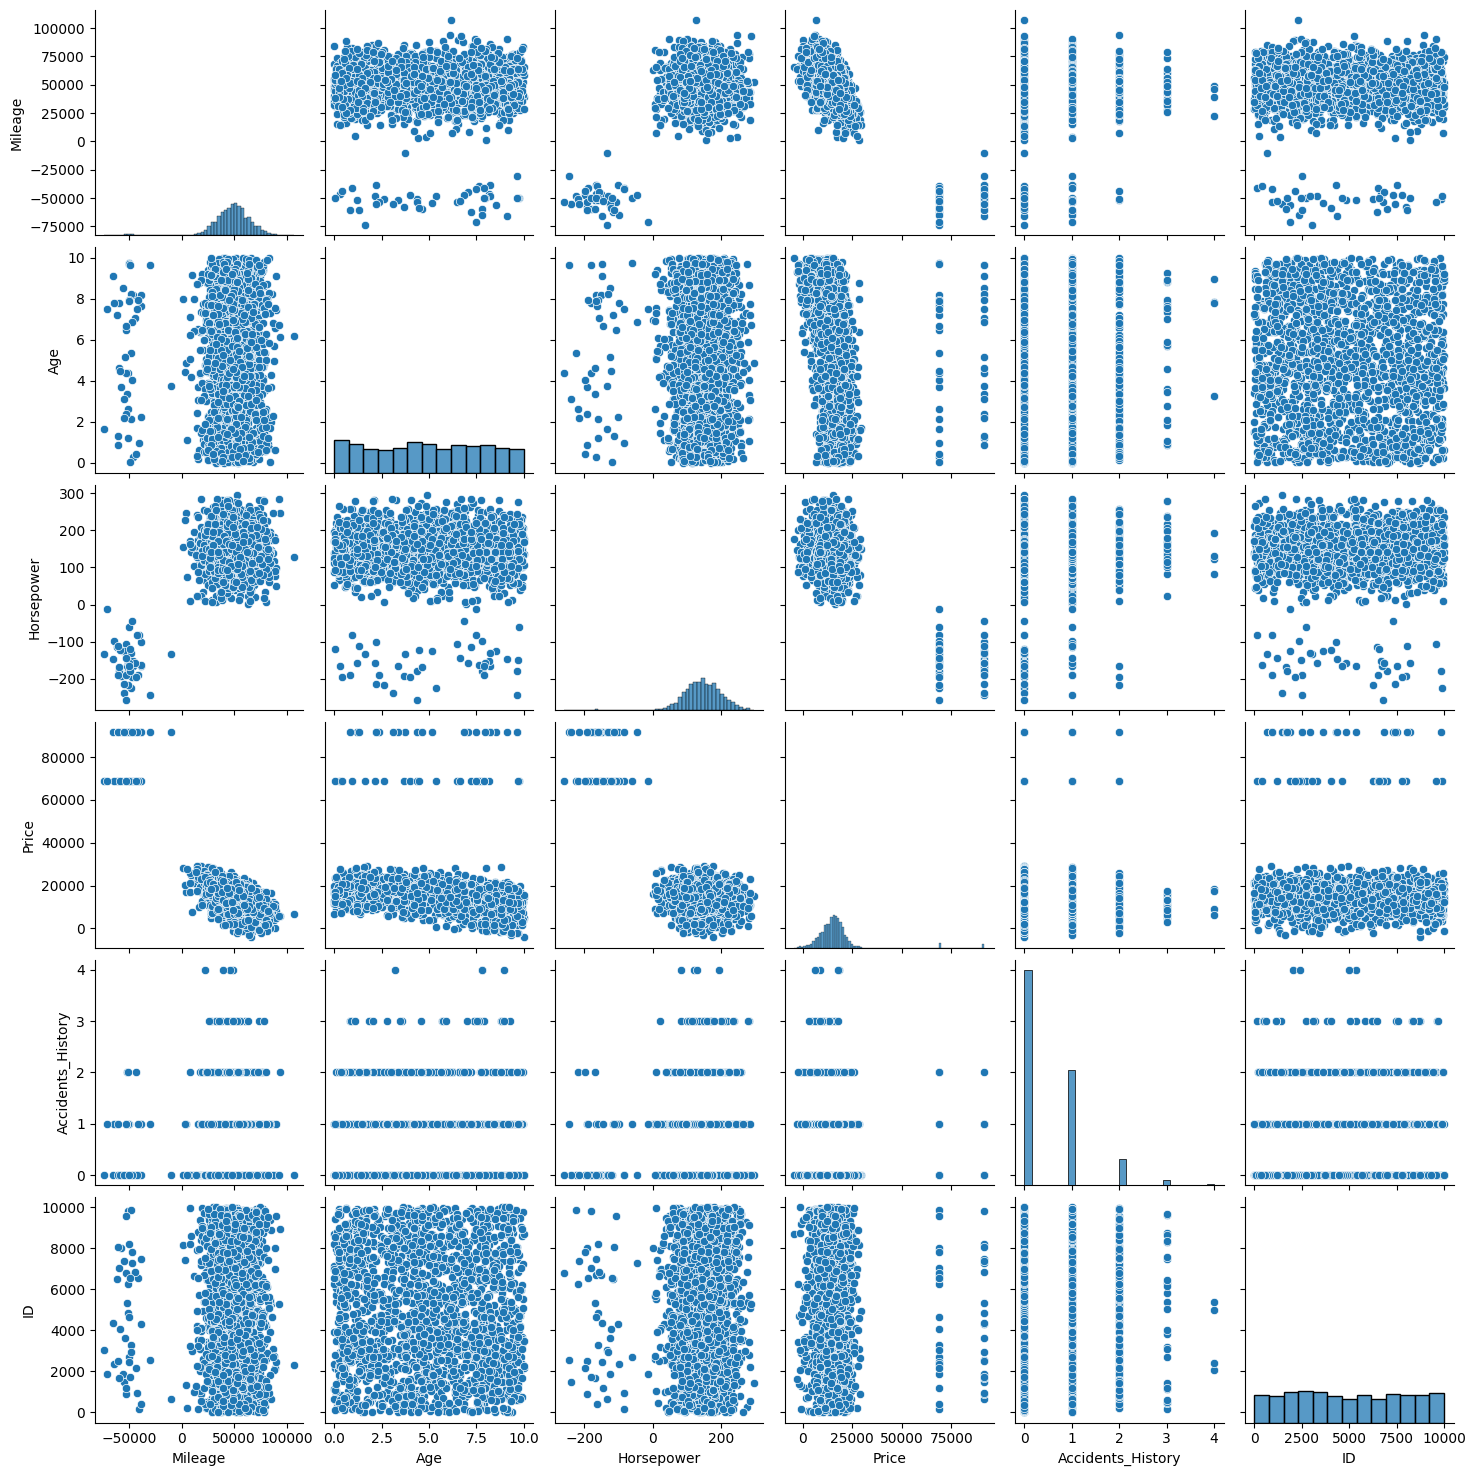

In [89]:
sns.pairplot(df_train)

In [92]:
df_train_1 = df_train.copy()
df_train_1[df_train_1["Mileage"] < 0] = 0
df_train_1[df_train_1["Horsepower"] < 0] = 0
df_train_1.describe()

,Mileage,Age,Horsepower,Price,Accidents_History,ID
count,2000.000000,1933.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48539.514709,4.776162,144.078854,14454.712964,0.501500,4865.154000
std,16462.509354,2.948758,54.824171,5732.117481,0.704447,2979.601405
min,0.000000,0.000000,0.000000,-4234.207009,0.000000,0.000000
25%,38666.978977,2.126962,109.931002,11087.204035,0.000000,2307.750000
50%,49345.990091,4.741638,144.027053,15135.622379,0.000000,4718.500000
75%,59000.476654,7.359590,180.082763,18345.771234,1.000000,7505.500000
max,107024.903225,9.999566,295.591933,29173.157604,4.000000,9997.000000


In [117]:
test = pd.read_csv("challenge_test.csv")
test.head()

,Mileage,Age,Brand,Horsepower,Accidents_History,Last_Service_Date,ID
0,55764.851078,8.818906,BMW,166.554774,1,2021-08-01,1622
1,53043.215667,6.230922,BMW,108.419204,1,2023-03-12,101
2,50782.476189,8.937179,Ford,171.856198,0,2022-01-20,3951
3,60632.893631,7.080065,Ford,136.408591,0,2021-12-18,397
4,11881.417885,0.698784,Toyota,147.636385,1,2021-02-22,4945


In [119]:
m1 = test["Mileage"].quantile(0.25)
m3 = test["Mileage"].quantile(0.75)
iqr = m3-m1
l1 = m1 - 1.5*iqr
l2 = m3 + 1.5*iqr
print(l1)
print(l2)

7196.285651831386
91233.89145441123


In [155]:
df_train["Last_Service_Date"].fillna("0000-00-00", inplace=True)
df_train[["Year", "Month", "Day"]] = df_train["Last_Service_Date"].str.split("-", expand=True)
df_train[["Year"]] = df_train[["Year"]].astype("int")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                1933 non-null   float64
 2   Brand              1921 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  2000 non-null   object 
 7   ID                 2000 non-null   int64  
 8   Year               2000 non-null   int64  
 9   Month              2000 non-null   object 
 10  Day                2000 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 172.0+ KB


<Axes: >

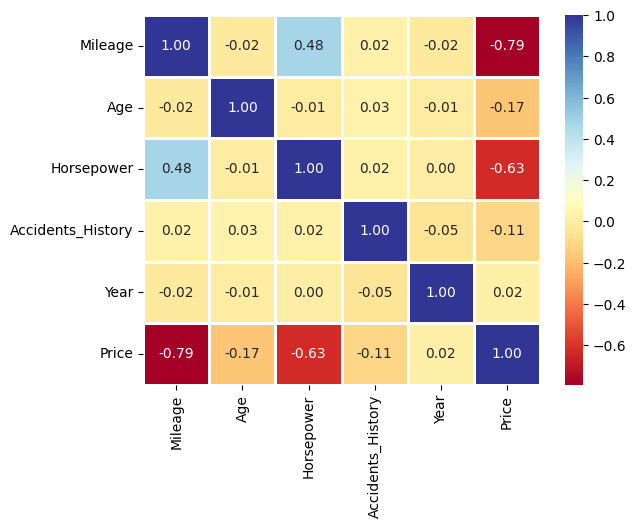

In [161]:
# checkink heatmap
sns.heatmap(df_train[["Mileage", 'Age', 'Horsepower', 'Accidents_History',"Year", 'Price']].corr(), annot = True, 
            cmap = 'RdYlBu', 
            fmt = '.2f', 
            annot_kws = None, 
            linewidths = 1,)

# Processing 

### Process missing values 

In [162]:
df_train["Brand"].fillna("Unknown", inplace=True)
df_train["Age"].fillna(df_train["Age"].median, inplace=True)

In [163]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                2000 non-null   object 
 2   Brand              2000 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  2000 non-null   object 
 7   ID                 2000 non-null   int64  
 8   Year               2000 non-null   int64  
 9   Month              2000 non-null   object 
 10  Day                2000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 172.0+ KB


In [165]:
df_train["Brand"].value_counts()

Brand
Toyota     633
Ford       616
BMW        575
Unknown     79
toyota      39
ford        32
bmw         26
Name: count, dtype: int64

In [167]:
df_train[df_train["Brand"] == "bmw"] = "BMW"
df_train[df_train["Brand"] == "toyota"] = "Toyota"
df_train[df_train["Brand"] == "ford"] = "Ford"

In [168]:
df_train["Brand"].value_counts()

Brand
Toyota     672
Ford       648
BMW        601
Unknown     79
Name: count, dtype: int64

In [173]:
df_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID,Year,Month,Day
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350,2020,10,31
1,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford,Ford
2,42237.214362,5.673198,BMW,22.18898,9203.644481,3,0000-00-00,3201,0,00,00
3,58520.110388,2.806898,Unknown,155.824358,11785.969236,0,2022-08-26,1332,2022,08,26
4,60376.767928,3.599798,Ford,155.421041,14663.60832,3,2021-12-22,2724,2021,12,22


In [172]:
df_train_1 = df_train[["Mileage", "Age", "Horsepower", "Accidents_History", "Brand", "Year", "Price"]]
df_train_1.head()

,Mileage,Age,Horsepower,Accidents_History,Brand,Year,Price
0,4307.854178,4.843951,246.315008,1,BMW,2020,17072.488092
1,Ford,Ford,Ford,Ford,Ford,Ford,Ford
2,42237.214362,5.673198,22.18898,3,BMW,0,9203.644481
3,58520.110388,2.806898,155.824358,0,Unknown,2022,11785.969236
4,60376.767928,3.599798,155.421041,3,Ford,2021,14663.60832


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statistics import mean

In [ ]:
# Convert object values to numeric values using LaberEncoder
for col in df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])